# Startups

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

### Loading the raw data

In [2]:
raw_data = pd.read_csv('Startups.csv')
raw_data.describe(include='all')

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,Florida,NaN
freq,NaN,NaN,NaN,50,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


# Question 1

### Define targets and inputs

In [15]:
raw_data=raw_data.drop(['State'],axis=1)

In [17]:
targets = raw_data['Profit']
inputs = raw_data.drop(['Profit'],axis=1)

In [19]:
f_regression(inputs, targets)[1].round(3)

array([0.   , 0.162, 0.   ])

## Question 2

### Train and Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

### Create the regression

In [24]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Display the weights

In [31]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_ 
reg_summary

,Features,Weights
0,R&D Expenditure,0.807273
1,Administration Expenditure,0.013976
2,Marketing Expenditure,0.024492


## Question 4

### R-squared value

In [37]:
reg.score(x_train, y_train)


0.9415127862211413

### Bias

In [43]:
y_pred = reg.predict(x_test)

# Calculate bias (predicted - actual)
bias = np.mean(y_pred - y_test)

In [45]:
bias

-3810.019517201773

## Question 5

### Testing

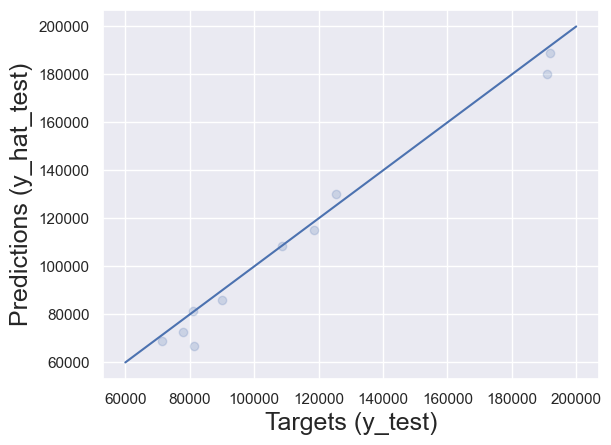

In [47]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.plot(range(60000, 200000), range(60000, 200000))
plt.show()

In [49]:
df_pf = pd.DataFrame()
df_pf['Residual'] = y_test - y_hat_test
df_pf['Difference%'] = np.absolute(df_pf['Residual']/y_test*100)

df_pf.describe()

,Residual,Difference%
count,10.000000,10.000000
mean,3810.019517,4.714955
std,5539.568812,5.090129
min,-4865.049693,0.369325
25%,944.132743,1.706441
50%,2904.035062,3.738761
75%,4886.861001,5.380312
max,14566.220275,17.932277


## Question 6

### Define a new dataset

In [52]:
data2 = raw_data

In [60]:
data2

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Define new targets and variables

In [55]:
targets = data2['Profit']
inputs = data2.drop(['Profit'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

### Perform the linear regression

In [58]:
reg = LinearRegression()
reg.fit(inputs,targets)

LinearRegression()

### Display the new weights

In [65]:
weights = reg.coef_


### Display the new intercept

In [68]:
intercept = reg.intercept_


In [81]:
inputs

,R&D Expenditure,Administration Expenditure,Marketing Expenditure
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


### Predict the profit

In [95]:
new_input=[[125000,120000,420000]]

In [97]:
new_input_reshaped = np.array(new_input).reshape(1, -1)


In [99]:
reg.predict(new_input_reshaped)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([159054.44523831])